# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

ii. what preprocessing steps you implemented


I choose Revelstoke, BC.

In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-1-ce712db0f07d>:45: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [ ]:
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

In [ ]:
hotelDf = pd.read_csv('reviews_revelstoke.csv', names = columnNames)

In [ ]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data/ca/181775/1185471/763880848.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Breakfast - all sugary. Do not pay more to th...",2,negative,09-Aug-20,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
1,data/ca/181775/1185471/656999094.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Rented 3 rooms for a sledding trip. Main heat...",3,negative,07-Mar-19,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
2,data/ca/181775/1185471/753683606.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Great place to stay in Revelstoke, not far fr...",4,positive,18-May-20,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
3,data/ca/181775/1185471/694438633.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Very clean lobby offering a good first impres...",4,positive,31-Jul-19,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
4,data/ca/181775/1185471/810428446.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""We just stayed overnight on our way from Drum...",5,positive,17-Sep-21,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0


In [ ]:
hotelDf = hotelDf[['filePath','hotelName','reviewColumn','ratingScore','groundTruth']]

In [ ]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,data/ca/181775/1185471/763880848.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Breakfast - all sugary. Do not pay more to th...",2,negative
1,data/ca/181775/1185471/656999094.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Rented 3 rooms for a sledding trip. Main heat...",3,negative
2,data/ca/181775/1185471/753683606.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Great place to stay in Revelstoke, not far fr...",4,positive
3,data/ca/181775/1185471/694438633.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Very clean lobby offering a good first impres...",4,positive
4,data/ca/181775/1185471/810428446.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""We just stayed overnight on our way from Drum...",5,positive


# Q1

#### (a)

Compute average Vader sentiment and average ground truth rating per hotel.


In [ ]:
reviews = hotelDf['reviewColumn'].values

In [ ]:
reviews

array(['"Breakfast - all sugary. Do not pay more to this pla e thinking that they have breakfast. Its not a breakfast at all. They offered us $12\\u002Fnight. But that won\'t get anything for 4 people. Cleanliness was poor as well. Front desk staff was rude and the manager was always unavailable to address yhe concern.',
       '"Rented 3 rooms for a sledding trip. Main heater didn\'t work, lights beside the beds didn\'t work, only had hot water one morning, old dirty carpet, hot tub that burned the eyes out of us in 5 min, cheap breakfast below average. ',
       '"Great place to stay in Revelstoke, not far from downtown and just off the highway.\\nSemi-quiet hotel, trains rumble through all day and all night.\\nCozy room, nicely carpeted and amenities were typical of Days Inn. Beds were very comfortable!',
       ...,
       '"This B&B is the perfect spot for your Revelstoke stay. Quiet location, comfortable beds and roomy bath rooms. Shared kitchen, decent breakfast and hot tub in t

In [ ]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=True, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [ ]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 1498/1498 [00:05<00:00, 275.33it/s]


In [ ]:
reviewDF.head()

,reviewCol,vader
0,"""Breakfast - all sugary. Do not pay more to th...",-0.7470
1,"""Rented 3 rooms for a sledding trip. Main heat...",-0.4404
2,"""Great place to stay in Revelstoke, not far fr...",0.8976
3,"""Very clean lobby offering a good first impres...",0.9679
4,"""We just stayed overnight on our way from Drum...",0.9709


In [ ]:
var_score = reviewDF["vader"]

In [ ]:
df_final = hotelDf[["hotelName","ratingScore"]].join(var_score)

In [ ]:
df_final = df_final.join(reviewDF['reviewCol'])

In [ ]:
df_final.head()

,hotelName,ratingScore,vader,reviewCol
0,Days Inn &amp; Suites by Wyndham Revelstoke,2,-0.7470,"""Breakfast - all sugary. Do not pay more to th..."
1,Days Inn &amp; Suites by Wyndham Revelstoke,3,-0.4404,"""Rented 3 rooms for a sledding trip. Main heat..."
2,Days Inn &amp; Suites by Wyndham Revelstoke,4,0.8976,"""Great place to stay in Revelstoke, not far fr..."
3,Days Inn &amp; Suites by Wyndham Revelstoke,4,0.9679,"""Very clean lobby offering a good first impres..."
4,Days Inn &amp; Suites by Wyndham Revelstoke,5,0.9709,"""We just stayed overnight on our way from Drum..."


In [ ]:
hotelNames = df_final['hotelName'].unique()
hotelNames[:10]

array(['Days Inn &amp; Suites by Wyndham Revelstoke',
       'Mulvehill Creek Wilderness Inn and Wedding Chapel',
       'Powder Pillow Bed &amp; Breakfast', 'Frontier Motel',
       'Best Western Plus Revelstoke',
       'The Sutton Place Hotel Revelstoke Mountain Resort',
       'Glacier House Resort', 'Regent Hotel', 'Grizz Hotel',
       'Selkirk Mountain Experience'], dtype=object)

In [ ]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [ ]:
avg_rating_df = avg_rating_per_hotel(df_final)
avg_rating_df

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Adventurer&#39;s Guest House,0.939200,4.888889,63
Alpenrose Bed and Breakfast,0.951429,4.840000,100
Alpine Inn &amp; Suites,0.530298,3.090000,100
Best Western Plus Revelstoke,0.920288,4.920000,25
Courthouse Inn Revelstoke,0.949941,4.910000,100
Days Inn &amp; Suites by Wyndham Revelstoke,0.578605,3.570000,100
Frontier Motel,0.217448,2.241758,91
Glacier House Resort,0.758774,4.120000,100
Grizz Hotel,0.478953,2.882353,17


#### (b)


##### (i) 

Rank hotels by Average Ground Truth Sentiment

In [ ]:
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].head(5)
avgRatingTop5

,hotelName,AverageRatingScore
3,Best Western Plus Revelstoke,4.920000
17,The Copeland,4.916667
4,Courthouse Inn Revelstoke,4.910000
0,Adventurer&#39;s Guest House,4.888889
15,Selkirk Mountain Experience,4.887324


Rank hotels by Average Vader Compound Sentiment Score

In [ ]:
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].head(5)
avgVaderTop5

,hotelName,AverageVader
15,Selkirk Mountain Experience,0.965638
1,Alpenrose Bed and Breakfast,0.951429
17,The Copeland,0.950758
4,Courthouse Inn Revelstoke,0.949941
12,Powder Pillow Bed &amp; Breakfast,0.940085


Show both top-5 and bottom-5 for both ranking methods. Do they agree? If not discuss any differences.

In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderTop5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingTop5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Top 5 hotels avg rating vs. avg vader score:
+--------+------------------------------+-----------------------------------+
|   Rank | avg Rating                   | avg Vader                         |
+========+==============================+===================================+
|      0 | Best Western Plus Revelstoke | Selkirk Mountain Experience       |
+--------+------------------------------+-----------------------------------+
|      1 | The Copeland                 | Alpenrose Bed and Breakfast       |
+--------+------------------------------+-----------------------------------+
|      2 | Courthouse Inn Revelstoke    | The Copeland                      |
+--------+------------------------------+-----------------------------------+
|      3 | Adventurer&#39;s Guest House | Courthouse Inn Revelstoke         |
+--------+------------------------------+-----------------------------------+
|      4 | Selkirk Mountain Experience  | Powder Pillow Bed &amp; Breakfast |
+--------+---------

For top 5 ranking hotel:

1. We have `The Copeland`, `Selkirk Mountain Experience` and `Courthouse Inn Revelstoke` in both top 5 of vader and ground truth ranking.

2. However, we have `Best Western Plus Revelstoke` and `Adventurer&#39;s Guest House` in ground truth; `Alpenrose Bed and Breakfast` and `Powder Pillow Bed &amp; Breakfast` in Vader.

In [ ]:
avgRatingBottom5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].tail(5)
avgRatingBottom5

,hotelName,AverageRatingScore
5,Days Inn &amp; Suites by Wyndham Revelstoke,3.570000
16,Super 8 by Wyndham Revelstoke BC,3.130000
2,Alpine Inn &amp; Suites,3.090000
8,Grizz Hotel,2.882353
6,Frontier Motel,2.241758


In [ ]:
avgVaderBottom5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].tail(5)
avgVaderBottom5

,hotelName,AverageVader
5,Days Inn &amp; Suites by Wyndham Revelstoke,0.578605
2,Alpine Inn &amp; Suites,0.530298
16,Super 8 by Wyndham Revelstoke BC,0.485474
8,Grizz Hotel,0.478953
6,Frontier Motel,0.217448


In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Bottom 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderBottom5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingBottom5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Bottom 5 hotels avg rating vs. avg vader score:
+--------+---------------------------------------------+---------------------------------------------+
|   Rank | avg Rating                                  | avg Vader                                   |
+========+=============================================+=============================================+
|      0 | Days Inn &amp; Suites by Wyndham Revelstoke | Days Inn &amp; Suites by Wyndham Revelstoke |
+--------+---------------------------------------------+---------------------------------------------+
|      1 | Super 8 by Wyndham Revelstoke BC            | Alpine Inn &amp; Suites                     |
+--------+---------------------------------------------+---------------------------------------------+
|      2 | Alpine Inn &amp; Suites                     | Super 8 by Wyndham Revelstoke BC            |
+--------+---------------------------------------------+---------------------------------------------+
|      3 | Grizz Hotel   


For bottom 5 ranking hotel, we have same hotel for both vader and ground truth ranking but different ranking for `Alpine Inn &amp; Suites` and `Super 8 by Wyndham Revelstoke BC`

# Q2

### (a)
Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection. Which words appear to be location specific? What words appear in both positive and negative reviews? Do any words that appear in both lists surprise you?

In [ ]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

In [ ]:
def dataFrameTransformation(hotelDf, reviewDF, topk):


    stop = get_stop_words()
    counter = Counter()

    reviews = reviewDF['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(topk)

    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf, topk

In [ ]:
finaldf, topk = dataFrameTransformation(hotelDf, reviewDF, topk=500)

In [ ]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,great,breakfast,clean,place,would,...,juice,truly,provide,tired,expectations,middle,travel,others,fabulous,unfortunately
0,Days Inn &amp; Suites by Wyndham Revelstoke,2,negative,"""Breakfast - all sugary. Do not pay more to th...",-0.7470,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Days Inn &amp; Suites by Wyndham Revelstoke,3,negative,"""Rented 3 rooms for a sledding trip. Main heat...",-0.4404,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Days Inn &amp; Suites by Wyndham Revelstoke,4,positive,"""Great place to stay in Revelstoke, not far fr...",0.8976,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Days Inn &amp; Suites by Wyndham Revelstoke,4,positive,"""Very clean lobby offering a good first impres...",0.9679,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Days Inn &amp; Suites by Wyndham Revelstoke,5,positive,"""We just stayed overnight on our way from Drum...",0.9709,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower() 
                          for word 
                          in re.findall(r'\w+', review) 
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [ ]:
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]

In [ ]:
itemAnalysisDf.head()

,reviewCol,groundTruth,vader
0,"""Breakfast - all sugary. Do not pay more to th...",negative,-0.7470
1,"""Rented 3 rooms for a sledding trip. Main heat...",negative,-0.4404
2,"""Great place to stay in Revelstoke, not far fr...",positive,0.8976
3,"""Very clean lobby offering a good first impres...",positive,0.9679
4,"""We just stayed overnight on our way from Drum...",positive,0.9709


In [ ]:
topkGroundPos = getTopK(itemAnalysisDf, 50, label_value='positive')
topkGroundPos

[('great', 711),
 ('breakfast', 589),
 ('clean', 470),
 ('revelstoke', 415),
 ('place', 400),
 ('good', 374),
 ('friendly', 368),
 ('comfortable', 367),
 ('would', 358),
 ('nice', 340),
 ('one', 316),
 ('well', 296),
 ('stayed', 290),
 ('hot', 279),
 ('town', 251),
 ('night', 238),
 ('back', 233),
 ('also', 228),
 ('really', 227),
 ('time', 222),
 ('day', 220),
 ('area', 213),
 ('bed', 211),
 ('nthe', 201),
 ('ski', 199),
 ('recommend', 179),
 ('location', 178),
 ('food', 177),
 ('tub', 175),
 ('helpful', 170),
 ('like', 170),
 ('family', 170),
 ('quiet', 169),
 ('pool', 169),
 ('beautiful', 162),
 ('resort', 159),
 ('definitely', 158),
 ('beds', 157),
 ('amazing', 157),
 ('mountain', 152),
 ('wonderful', 147),
 ('two', 146),
 ('lovely', 145),
 ('excellent', 144),
 ('experience', 144),
 ('trip', 144),
 ('everything', 142),
 ('spacious', 140),
 ('made', 140),
 ('home', 136)]

In [ ]:
topkGroundNeg = getTopK(itemAnalysisDf, 50, label_value='negative')
topkGroundNeg

[('would', 188),
 ('one', 180),
 ('night', 174),
 ('place', 164),
 ('clean', 135),
 ('good', 133),
 ('like', 122),
 ('breakfast', 119),
 ('bed', 118),
 ('get', 104),
 ('stayed', 103),
 ('hot', 100),
 ('old', 100),
 ('back', 91),
 ('nice', 90),
 ('revelstoke', 86),
 ('small', 85),
 ('could', 85),
 ('front', 83),
 ('nthe', 83),
 ('even', 83),
 ('time', 82),
 ('said', 79),
 ('desk', 77),
 ('area', 73),
 ('got', 69),
 ('two', 69),
 ('friendly', 69),
 ('well', 68),
 ('great', 68),
 ('check', 68),
 ('told', 68),
 ('motel', 67),
 ('day', 67),
 ('town', 65),
 ('asked', 65),
 ('really', 64),
 ('way', 63),
 ('door', 62),
 ('beds', 61),
 ('tub', 61),
 ('price', 61),
 ('also', 61),
 ('restaurant', 58),
 ('booked', 57),
 ('sleep', 56),
 ('better', 55),
 ('bathroom', 55),
 ('lot', 54),
 ('never', 53)]

In [ ]:
print('words appear in both list:')
for i in range(len(topkGroundPos)):
  for j in range(len(topkGroundNeg)):
    if topkGroundPos[i][0] == topkGroundNeg[j][0]:
      print(topkGroundPos[i][0])

words appear in both list:
great
breakfast
clean
revelstoke
place
good
friendly
would
nice
one
well
stayed
hot
town
night
back
also
really
time
day
area
bed
nthe
tub
like
beds
two


The word `revelstoke`, `resort`, `restaurant`, `bathroom`and `mountain` are location specific. 

The words shown above appear in both list.

Both list appear `great`, `clean`, `good` and `friendly` surprise me, since they are words with positive attitude, but appear in the negative review list as well.

### (b)
Repeat this analysis for the top-50 noun phrases (using the provided grammar pattern below). Do any noun phrases appear in both positive and negative reviews? Identify a noun phrase you did not expect to see in the positive reviews and explain why it may be there.

In [ ]:
# grammar = r"""
#   NBAR:
#   {<NN.*|JJ>*<NN.*>} # Nouns and Adjectives, terminated with Nouns
  
#   NP:
#   {<NBAR><IN><NBAR>}
#   {<NBAR>} # Above, connected with in/of/etc...
#   """

In [ ]:
grammar = r"""
  NBAR:
  {<NN.*|JJ>*<NN.*>} # Nouns and Adjectives, terminated with Nouns
  
  NP:
  {<NBAR><IN><NBAR>}
  {<NBAR>} # Above, connected with in/of/etc...
  """

In [ ]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

# Create phrase tree
chunker = nltk.RegexpParser(grammar)

In [ ]:
# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
      
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    # word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [ ]:
def getTopKNP(df, kNPs, groundTruth, chunker, pos_tag):

    counter = Counter()
    filtered_df = df[df["groundTruth"] == groundTruth]
    reviews = filtered_df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk, chunker, pos_tag):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [ ]:
topk_phrase_pos = getTopKNP(finaldf, 50, 'positive', chunker, pos_tag) 
topk_phrase_pos

[('hot tub', 110),
 ('front desk', 38),
 ('ghost town', 38),
 ('great place', 37),
 ('courthouse inn', 32),
 ('common area', 21),
 ('bedroom suite', 19),
 ('great host', 17),
 ('comfortable bed', 16),
 ('sutton place', 15),
 ('ski hill', 14),
 ('next year', 14),
 ('short walk', 13),
 ('powder pillow', 13),
 ('next time', 13),
 ('guest house', 13),
 ('coffee maker', 12),
 ('road trip', 12),
 ('nice touch', 11),
 ('free breakfast', 11),
 ('minute drive', 11),
 ('great time', 11),
 ('delicious breakfast', 11),
 ('ski resort', 10),
 ('first time', 10),
 ('second floor', 10),
 ('continental breakfast', 9),
 ('centre town', 9),
 ('quiet location', 9),
 ('minute walk', 8),
 ('next day', 8),
 ('good value', 8),
 ('good location', 8),
 ('long day', 8),
 ('hot shower', 8),
 ('durrand glacier', 8),
 ('course breakfast', 8),
 ('frozen yogurt', 8),
 ('enchanted forest', 8),
 ('many time', 7),
 ('perfect place', 7),
 ('short drive', 7),
 ('last minute', 7),
 ('gas station', 7),
 ('comfy bed', 7),
 (

In [ ]:
topk_phrase_neg = getTopKNP(finaldf, 50, 'negative', chunker, pos_tag)
topk_phrase_neg

[('front desk', 38),
 ('hot tub', 35),
 ('ghost town', 14),
 ('gas station', 13),
 ('parking lot', 12),
 ('hot water', 8),
 ('air conditioner', 8),
 ('next morning', 7),
 ('ground floor', 7),
 ('bedroom suite', 6),
 ('short drive', 5),
 ('good sleep', 5),
 ('next day', 5),
 ('coffee maker', 5),
 ('last minute', 4),
 ('small dog', 4),
 ('good size', 4),
 ('customer service', 4),
 ('many hotel', 4),
 ('long day', 4),
 ('double bed', 4),
 ('good value', 4),
 ('greyhound bus', 4),
 ('continental breakfast', 4),
 ('best western', 4),
 ('ice cream', 4),
 ('day inn revelstoke', 3),
 ('first day', 3),
 ('labour day weekend', 3),
 ('great place', 3),
 ('credit card', 3),
 ('full refund', 3),
 ('nthe front desk', 3),
 ('mulvehill creek', 3),
 ('negative review', 3),
 ('road trip', 3),
 ('mini fridge', 3),
 ('hour drive', 3),
 ('first night', 3),
 ('first place', 3),
 ('star motel', 3),
 ('main highway', 3),
 ('ol frontier', 3),
 ('phone call', 3),
 ('ac unit', 3),
 ('several time', 3),
 ('high h

In [ ]:
print('words appear in both list:')
for i in range(len(topk_phrase_pos)):
  for j in range(len(topk_phrase_neg)):
    if topk_phrase_pos[i][0] == topk_phrase_neg[j][0]:
      print(topk_phrase_pos[i][0])

words appear in both list:
hot tub
front desk
ghost town
great place
bedroom suite
coffee maker
road trip
continental breakfast
next day
good value
long day
short drive
last minute
gas station
ground floor


The noun phrases shown above appear in both positive and negative reviews.

The appearance of ghost town in positive reivews surprise me. The reason why ghost town appear in the positive reviews is there are Heritage Ghost Towns, near Revelstoke, British Columbia, which are the spirit of the frontier lives on.

### (c) 
Define a grammar for a phrase pattern (different from the one already provided) that you think would be helpful for review analysis.

In [ ]:
# grammar2 = r"""
#   NBAR:
#   {<NEG.*>*<JJ.*>*<NN.*>*<CC>*<NEG.*>*<JJ.*>*<NN.*>} 
  
#   NP:
#   {<NBAR><IN><NBAR>}
#   {<NBAR>} # Above, connected with in/of/etc...
#   """

In [ ]:
grammar2 = r"""
  NBAR:
  {<NEG.*>*<JJ.*>*<NN.*>*<CC>*<NEG.*>*<JJ.*>*<NN.*>} 
  
  NP:
  {<NBAR><IN><NBAR>}
  {<NBAR>} # Above, connected with in/of/etc...
  """

In [ ]:
tagger2 = PerceptronTagger()
pos_tag2 = tagger.tag

In [ ]:
# Create phrase tree
chunker2 = nltk.RegexpParser(grammar2)

In [ ]:
topk_phrase2_pos = getTopKNP(finaldf, 50, 'positive', chunker2, pos_tag2) 
topk_phrase2_pos

[('hot tub', 76),
 ('great place', 36),
 ('front desk', 36),
 ('ghost town', 35),
 ('courthouse inn', 32),
 ('bedroom suite', 19),
 ('common area', 19),
 ('great host', 16),
 ('comfortable bed', 15),
 ('next year', 14),
 ('sutton place', 14),
 ('powder pillow', 13),
 ('guest house', 13),
 ('free breakfast', 12),
 ('short walk', 12),
 ('road trip', 12),
 ('next time', 12),
 ('pool hot tub', 12),
 ('nice touch', 11),
 ('minute drive', 11),
 ('great time', 11),
 ('bed breakfast', 11),
 ('continental breakfast', 10),
 ('ski hill', 10),
 ('ski resort', 10),
 ('first time', 10),
 ('friendly helpful', 9),
 ('coffee maker', 9),
 ('clean bed', 9),
 ('centre town', 9),
 ('second floor', 9),
 ('delicious breakfast', 9),
 ('minute walk', 8),
 ('next day', 8),
 ('good value', 8),
 ('long day', 8),
 ('hot shower', 8),
 ('durrand glacier', 8),
 ('course breakfast', 8),
 ('frozen yogurt', 8),
 ('many time', 7),
 ('perfect place', 7),
 ('best place', 7),
 ('quiet location', 7),
 ('good location', 7),
 

In [ ]:
topk_phrase2_neg = getTopKNP(finaldf, 50, 'negative', chunker2, pos_tag2) 
topk_phrase2_neg

[('front desk', 38),
 ('hot tub', 30),
 ('ghost town', 13),
 ('parking lot', 12),
 ('gas station', 11),
 ('air conditioner', 8),
 ('hot water', 7),
 ('next morning', 7),
 ('ground floor', 7),
 ('bedroom suite', 6),
 ('short drive', 5),
 ('good sleep', 5),
 ('next day', 5),
 ('worst place', 5),
 ('last minute', 4),
 ('continental breakfast', 4),
 ('small dog', 4),
 ('good size', 4),
 ('customer service', 4),
 ('many hotel', 4),
 ('long day', 4),
 ('double bed', 4),
 ('greyhound bus', 4),
 ('fridge microwave', 4),
 ('main highway', 4),
 ('best western', 4),
 ('ice cream', 4),
 ('day inn revelstoke', 3),
 ('first day', 3),
 ('labour day weekend', 3),
 ('great place', 3),
 ('credit card', 3),
 ('full refund', 3),
 ('good place', 3),
 ('nthe front desk', 3),
 ('mulvehill creek', 3),
 ('negative review', 3),
 ('hour drive', 3),
 ('first night', 3),
 ('first place', 3),
 ('star motel', 3),
 ('ol frontier', 3),
 ('ac unit', 3),
 ('several time', 3),
 ('high hope', 3),
 ('fresh towel', 3),
 ('s

In [ ]:
print('words appear in both list:')
for i in range(len(topk_phrase2_pos)):
  for j in range(len(topk_phrase2_neg)):
    if topk_phrase2_pos[i][0] == topk_phrase2_neg[j][0]:
      print(topk_phrase2_pos[i][0])

words appear in both list:
hot tub
great place
front desk
ghost town
bedroom suite
pool hot tub
continental breakfast
next day
long day
short drive
last minute


1. Words `road trip`, `good value`, `coffee maker` and `gas station` disappear.

2. The grammar2 could capture some negation pattern in the review, e.g. not good and not peaceful place.

3. The frequency of top words does not change too much.


The word `good value`, which is positive noun phrase, was removed from negative, which means adding negation expression in the new grammar works.

# Q3

### (a)
 Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentiment-bearing non-stopwords in the review collection. Which words get the highest MI values? Does this make sense?

In [ ]:
def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [ ]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])]) 
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [ ]:
topk = getTopKWords(reviewDF, 50)

In [ ]:
miScoredf = getMI(topk, finaldf)

In [ ]:
miScoredf

,Word,MI Score
0,great,0.040407
10,comfortable,0.022752
1,breakfast,0.019603
11,night,0.015587
46,definitely,0.014115
8,friendly,0.013131
40,helpful,0.012369
30,get,0.009471
38,small,0.008300
42,beautiful,0.007649


From the dataframe above, great has the highest MI score. This make sense, a higher mutual information score between two words indicates that they co-occur more often than would be expected by chance, and therefore they are more strongly associated or dependent on each other. We have `great`, `comfortable` ,`friendly` and `helpful` appear with high frequency, those usually represent positive attitude in English.

###(b)
Repeat this analysis for the top-50 noun phrases using the grammar you found most effective in Q2. Which noun phrases get the highest MI values? Based on these results what would you recommend the hotels in your city might need to improve?


In [ ]:
def getTopKNP_all(df, kNPs,chunker, pos_tag):

    counter = Counter()
    # filtered_df = df[df["groundTruth"] == groundTruth]
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

In [ ]:
def getTopKNP_all(df, kNPs, chunker,pos_tag):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

def NPdataFrameTransformation(hotelDf, reviewDF, topk,chunker, pos_tag):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [ ]:
topk_all=getTopKNP_all(finaldf, 50, chunker2, pos_tag2) 

In [ ]:
finaldf_all = NPdataFrameTransformation(hotelDf, reviewDF, topk_all, chunker2, pos_tag2)

In [ ]:
miScoredf_all = getMI(topk_all, finaldf_all)

In [ ]:
miScoredf_all.head(10)

,Word,MI Score
1,front desk,0.006797
4,courthouse inn,0.005367
7,parking lot,0.004891
11,gas station,0.004857
40,hot water,0.003480
8,great host,0.003290
10,comfortable bed,0.003083
3,great place,0.003028
15,next year,0.002670
24,powder pillow,0.002464


The word `front desk` get the highest MI value.

Based on the result shown above, the noun phrase with the top 10 high MI score is `front desk`, `courthouse inn`, `parking lot`, `gas station`, `hot water`,`great host`,`comfortable bed`,`great place`,`next year` and `powder pillow`.
These words related to the customer service and their living experience. The hotel might need to improve their quality of customer services and pay more attention to their room quality and client's living experience.

# Q4

###(a)
For ground truth sentiment, calculate the top-50 words according to Pointwise Mutual In- formation (PMI) of the word occurring with (i) positive reviews and (ii) negative reviews. Discuss at least 3 interesting and/or locale-specific findings about these top-ranked words.

In [ ]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [ ]:
topk = getTopKWords(reviewDF, 50)

In [ ]:
pmiposdf = pmiForAllCal(finaldf,topk,'positive')

100%|██████████| 50/50 [00:00<00:00, 427.24it/s]


In [ ]:
pmiposdf.sort_values('pmi',ascending=0).head(5)

,pmi
definitely,0.226054
helpful,0.208036
great,0.194763
comfortable,0.186677
ski,0.184082


In [ ]:
#Sorted top pmi words for negative reviews
pminegdf = pmiForAllCal(finaldf,topk,'negative')
pminegdf.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 595.75it/s]


,pmi
small,0.504512
get,0.502323
night,0.445697
even,0.413637
like,0.39754


1. The word `night` has high pmi score in negative reviews, except some people mentioned night to describe the number of days they booked. The trail cars in the night were mentioned many times in negative reviews.

2. The word `helpful` has high pmi score in positive reviews, the clerk in the hotel were helpful and received highly positive feedback.

3. The word `ski` has high pmi score in positive reviews, in many positive reviews, clients mentioned skiing related services the hotel has, e.g. `ski hill access` and `ski area shuttle bus`. The hotel could provide more skiing related services to improve their service. 

###(b)
Repeat this analysis for the top-50 noun phrases using your preferred grammar and discuss at least 3 interesting results.

In [ ]:
topk_all=getTopKNP_all(finaldf, 50, chunker2, pos_tag2) 

In [ ]:
topk_all

[('hot tub', 106),
 ('front desk', 74),
 ('ghost town', 48),
 ('great place', 39),
 ('courthouse inn', 32),
 ('bedroom suite', 25),
 ('common area', 20),
 ('parking lot', 17),
 ('great host', 16),
 ('sutton place', 16),
 ('comfortable bed', 15),
 ('gas station', 15),
 ('pool hot tub', 15),
 ('continental breakfast', 14),
 ('road trip', 14),
 ('next year', 14),
 ('next time', 14),
 ('guest house', 14),
 ('air conditioner', 13),
 ('bed breakfast', 13),
 ('next day', 13),
 ('ground floor', 13),
 ('free breakfast', 13),
 ('short walk', 13),
 ('powder pillow', 13),
 ('nice touch', 12),
 ('short drive', 12),
 ('next morning', 12),
 ('ski hill', 12),
 ('minute drive', 12),
 ('long day', 12),
 ('ski resort', 12),
 ('second floor', 11),
 ('last minute', 11),
 ('coffee maker', 11),
 ('great time', 11),
 ('first time', 11),
 ('friendly helpful', 10),
 ('good value', 10),
 ('frozen yogurt', 10),
 ('hot water', 9),
 ('minute walk', 9),
 ('first day', 9),
 ('good sleep', 9),
 ('clean bed', 9),
 ('ce

In [ ]:
pmiposdf_all = pmiForAllCal(finaldf_all,topk_all,'positive')

100%|██████████| 50/50 [00:00<00:00, 667.47it/s]


In [ ]:
pmiposdf_all.sort_values('pmi',ascending=0).head(50)

,pmi
clean bed,0.306097
great time,0.306097
courthouse inn,0.306097
great host,0.306097
next year,0.306097
comfortable bed,0.306097
delicious breakfast,0.306097
powder pillow,0.306097
centre town,0.306097
common area,0.25203


In [ ]:
pminegdf_all = pmiForAllCal(finaldf_all,topk_all,'negative')

100%|██████████| 50/50 [00:00<00:00, 741.32it/s]


In [ ]:
pminegdf_all.sort_values('pmi',ascending=0).head(50)

,pmi
hot water,1.081686
gas station,1.022845
parking lot,0.984694
air conditioner,0.847493
next morning,0.794004
good sleep,0.745214
ground floor,0.713961
front desk,0.668841
short drive,0.457532
good place,0.352171


1. `cleaned bed`, `comfortable bed`, `great host` and `delicious breakfast` have high pmi in positive reviews. Good living quality and the environment could make customers have higher ratings.

2. `hot water`, `air conditioner` and `good sleep` have high pmi in negative reviews. The fundamental instruments matters a lot for whether the hotel could have high ratings.

3. Both positive list and negative list have phrase like `next time` and `next year`, the satisfication could influence whether customer will come again.

###(c)
Repeat Q4a) and Q4b) for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why.

From Question 1, based on the ground truth rating, the top 1 hotel is `Best Western Plus Revelstoke` and the bottom 1 hotel is `Frontier Motel`

In [ ]:
hotelDf_top = hotelDf[hotelDf['hotelName']=='Best Western Plus Revelstoke']

In [ ]:
hotelDf_bot = hotelDf[hotelDf['hotelName']=='Frontier Motel']

In [ ]:
reviewDF_top = reviewDF.iloc[hotelDf_top.index]
reviewDF_bot = reviewDF.iloc[hotelDf_bot.index]

In [ ]:
hotelDf_top.reset_index(inplace=True)
hotelDf_bot.reset_index(inplace=True)
reviewDF_top.reset_index(inplace=True)
reviewDF_bot.reset_index(inplace=True)

In [ ]:
#4a
finaldf_top, topk_top = dataFrameTransformation(hotelDf_top, reviewDF_top, topk=50)
finaldf_bot, topk_bot = dataFrameTransformation(hotelDf_bot, reviewDF_bot, topk=50)

In [ ]:
pmiposdf_top = pmiForAllCal(finaldf_top,topk_top,'positive')

100%|██████████| 50/50 [00:00<00:00, 1020.49it/s]


In [ ]:
pmiposdf_top.head()

,pmi
great,0.0
breakfast,0.0
nice,0.0
clean,0.0
friendly,0.0


In [ ]:
pmiposdf_bot = pmiForAllCal(finaldf_bot,topk_bot,'positive')

100%|██████████| 50/50 [00:00<00:00, 1069.34it/s]


In [ ]:
pmiposdf_bot.head()

,pmi
place,0.098061
clean,0.311154
night,0.039221
motel,0.193371
one,-0.114113


In [ ]:
pminegdf_bot = pmiForAllCal(finaldf_bot,topk_bot,'negative')

100%|██████████| 50/50 [00:00<00:00, 728.57it/s]


In [ ]:
pminegdf_bot.head()

,pmi
place,-0.020545
clean,-0.074766
night,-0.007926
motel,-0.043017
one,0.021061


In [ ]:
hotelDf_top["groundTruth"].values

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

Since all of the ground truth for top-1 hotel is positive, so we cannot have PMI for top 50 words for negative reviews for top-1 hotel and the PMI for top-1 hotel for positive reviews is all 0.

In [ ]:
#4b
topk_all_top=getTopKNP_all(finaldf_top, 50, chunker2, pos_tag2) 

In [ ]:
finaldf_all_top = NPdataFrameTransformation(hotelDf_top, reviewDF_top, topk_all_top, chunker2, pos_tag2)

In [ ]:
pmiposdf_all_top = pmiForAllCal(finaldf_all_top,topk_all_top,'positive')
pmiposdf_all_top.sort_values('pmi',ascending=0).head()

100%|██████████| 50/50 [00:00<00:00, 1085.29it/s]


,pmi
front desk,0.0
positive experience,0.0
outdoor jacuzzi easy transportation,0.0
town centre beautiful,0.0
great restaurant,0.0


In [ ]:
topk_all_bot=getTopKNP_all(finaldf_bot, 50, chunker2, pos_tag2) 
finaldf_all_bot = NPdataFrameTransformation(hotelDf_bot, reviewDF_bot, topk_all_bot, chunker2, pos_tag2)

In [ ]:
pmiposdf_all_bot = pmiForAllCal(finaldf_all_bot,topk_all_bot,'positive')
pmiposdf_all_bot.sort_values('pmi',ascending=0).head()

100%|██████████| 50/50 [00:00<00:00, 1055.00it/s]


,pmi
frontier motel revelstoke,1.802809
hour reception,1.802809
banff nationalpark,1.802809
small clean nthe,1.802809
motel restaurant,1.802809


In [ ]:
pminegdf_all_bot = pmiForAllCal(finaldf_all_bot,topk_all_bot,'negative')
pminegdf_all_bot.sort_values('pmi',ascending=0).head()

100%|██████████| 50/50 [00:00<00:00, 1255.13it/s]


,pmi
gas station,0.180126
door nthe wall,0.180126
unplugged microwave,0.180126
ski package nit,0.180126
night u002fpp incl lift ticket,0.180126


Since all of the ground truth for top-1 hotel is positive, so we cannot have PMI for top-50 noun phrases for negative reviews for top-1 hotel and the PMI for top-50 noun phrases for top-1 hotel for positive reviews is all 0. So based on that we cannot get information about top1 hotel.

Based on the result, the bottom 1 hotel is near the banff national park, which received positive reviews, but the microwave in rooms are unplugged, which could be improved to increase the living experience. 

# Q5

**Note** Remember to save a static image of the map in the notebook

###(a) Histogram


####(i) 
Show separate histograms of ground truth and Vader sentiment scores (ignore hotel ID). Do you notice any interesting differences in their distributions? Does this surprise you?

In [ ]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

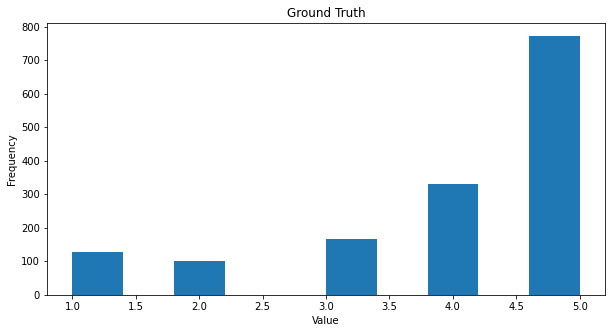

In [ ]:
#what is the distrubution in ground truth scores like?
getHistogram(finaldf,'ratingScore', 'Ground Truth')

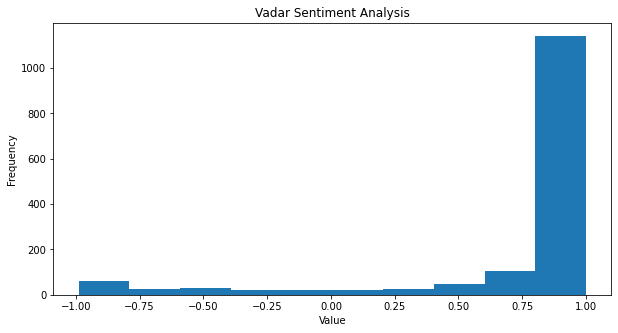

In [ ]:
# what is the distrubtuion in vader scores like?
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

For the distribution of ground truth, the number of score between 4.5 to 5 has the highest frequency. 

Most of the vader sentiment analysis scores fall between 0.75-1.00.

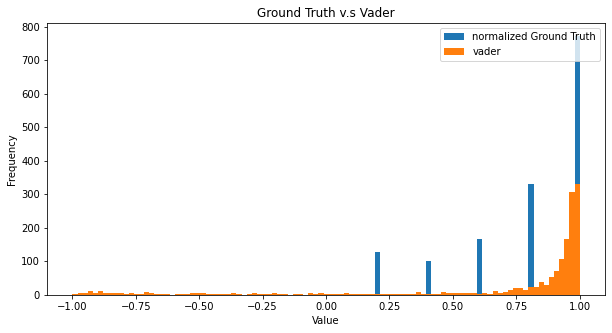

In [ ]:
# how do the distrubutions compare between ground truth (normalized) and vader
getHistogram(finaldf, 'both', 'Ground Truth v.s Vader')

####(ii) 

Show a histogram of the number of reviews per hotel. Do you notice any specific trends or are no trends apparent?

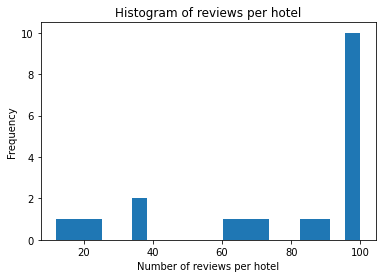

In [ ]:
review_counts = hotelDf.groupby('hotelName')['reviewColumn'].count()

review_counts.plot.hist(bins=20)

# Add axis labels and a title
plt.xlabel('Number of reviews per hotel')
plt.ylabel('Frequency')
plt.title('Histogram of reviews per hotel')

# Show the plot
plt.show()

Based on the histogram above, the distribution of the number of reviews per hotel shows a right skew. Most hotels has review between 80 to 100.

###(b) Boxplots

#### (i)
In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of side-by-side boxplots of these scores for the top-5 ranked hotels according to star rating.

In [ ]:
avgRatingTop5

,hotelName,AverageRatingScore
3,Best Western Plus Revelstoke,4.920000
17,The Copeland,4.916667
4,Courthouse Inn Revelstoke,4.910000
0,Adventurer&#39;s Guest House,4.888889
15,Selkirk Mountain Experience,4.887324


Text(0, 0.5, 'Rating score')

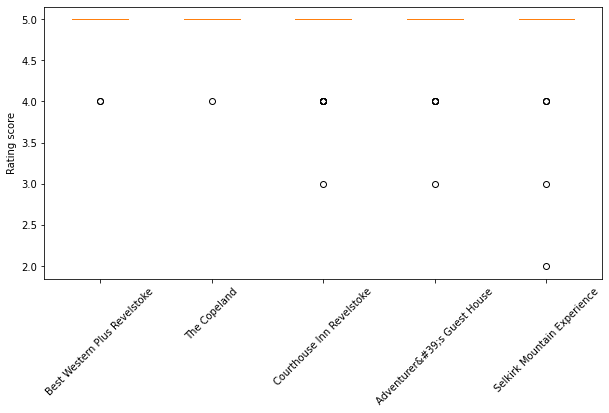

In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels = avgRatingTop5.iloc[:,0].tolist()

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('Rating score')

In [ ]:
avgVaderTop5

,hotelName,AverageVader
15,Selkirk Mountain Experience,0.965638
1,Alpenrose Bed and Breakfast,0.951429
17,The Copeland,0.950758
4,Courthouse Inn Revelstoke,0.949941
12,Powder Pillow Bed &amp; Breakfast,0.940085


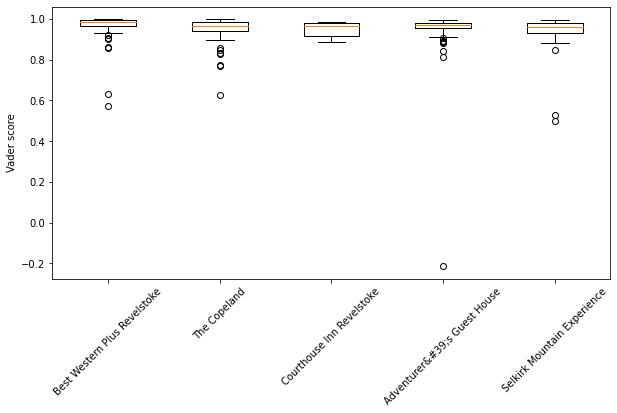

In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels_vader = avgVaderTop5.iloc[:,0].tolist()

hotel_list_vader = []
for hotel in five_hotels_vader:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_list_vader.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list_vader)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('Vader score')
plt.show()

In [ ]:
hotel_means = []
hotel_variances = []
print("mean and variance of the ground truth for top-5")
for i in range(len(hotel_list)):

    # Calculate mean and variance for each hotel
    mean = np.mean(hotel_list[i])
    variance = np.var(hotel_list[i])
    hotel_means.append(mean)
    hotel_variances.append(variance)
    
    #Print hotel name and corresponding mean and variance
    print(five_hotels[i], "Mean:", round(mean,3), "Variance:", round(variance,3))

mean and variance of the ground truth for top-5
Best Western Plus Revelstoke Mean: 4.92 Variance: 0.074
The Copeland Mean: 4.917 Variance: 0.076
Courthouse Inn Revelstoke Mean: 4.91 Variance: 0.102
Adventurer&#39;s Guest House Mean: 4.889 Variance: 0.131
Selkirk Mountain Experience Mean: 4.887 Variance: 0.213


In [ ]:
hotel_means_vader = []
hotel_variances_vader = []
print("mean and variance of vader for top-5")
for i in range(len(hotel_list_vader)):

    # Calculate mean and variance for each hotel
    mean = np.mean(hotel_list_vader[i])
    variance = np.var(hotel_list_vader[i])
    hotel_means_vader.append(mean)
    hotel_variances_vader.append(variance)
    
    #Print hotel name and corresponding mean and variance
    print(five_hotels_vader[i], "Mean:", round(mean,3), "Variance:", round(variance,3))

mean and variance of vader for top-5
Selkirk Mountain Experience Mean: 0.966 Variance: 0.005
Alpenrose Bed and Breakfast Mean: 0.951 Variance: 0.003
The Copeland Mean: 0.951 Variance: 0.001
Courthouse Inn Revelstoke Mean: 0.95 Variance: 0.015
Powder Pillow Bed &amp; Breakfast Mean: 0.94 Variance: 0.007


Generally speaking, boxplot is more informative, since from boxplot we could get the min, 25% quartile, mean, 75% quartile and max. Mean and variance could only get two values. 

###(c) Scatterplots and heatmaps

####(i)

Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores?


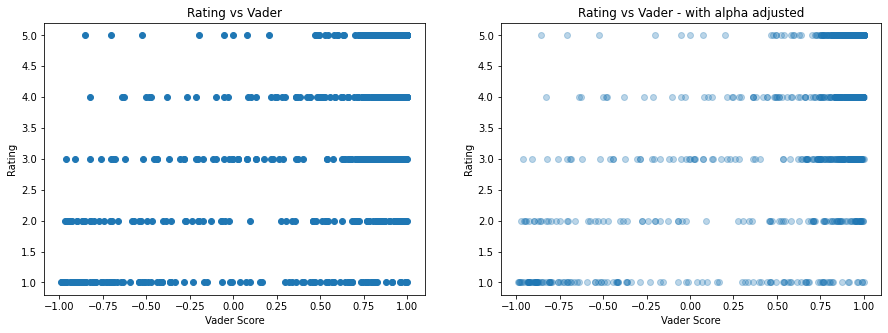

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Vader Score')

In [ ]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

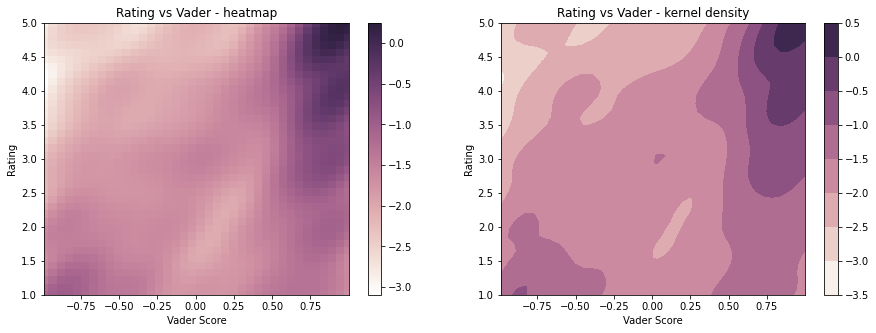

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density');

From the scatterplot and heatmap, we could know that most of the rating falls in top right and bottom left, that is, higher positive vader score usually corresponding to higher rating; smaller negative vader score usually corresponding to lower rating, which match the common sense.


#### (ii)

Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Provide 2 comments on any trends, or lack of trends you see.

In [ ]:
finaldf['review_length'] = finaldf['reviewCol'].apply(len)

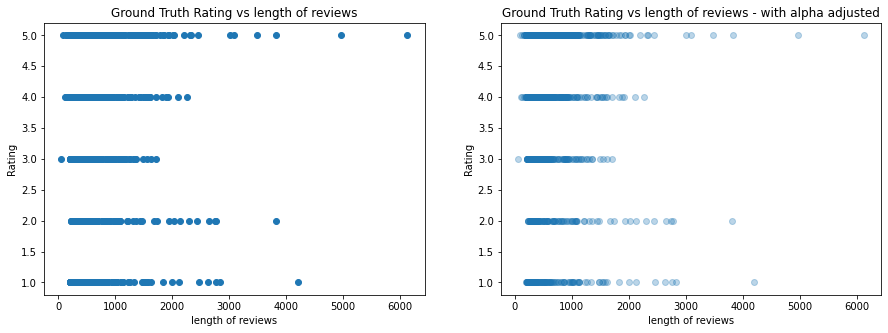

In [ ]:
#ground truth & length of reviews
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
review_length = finaldf['review_length'].values
ax[0].plot(review_length, rating_scores,"o")
ax[1].plot(review_length, rating_scores,"o", alpha=0.3)

ax[0].set_title('Ground Truth Rating vs length of reviews')
ax[1].set_title('Ground Truth Rating vs length of reviews - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('length of reviews')

In [ ]:
k = gaussian_kde(np.vstack([review_length, rating_scores]))
xi, yi = np.mgrid[review_length.min():review_length.max():review_length.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

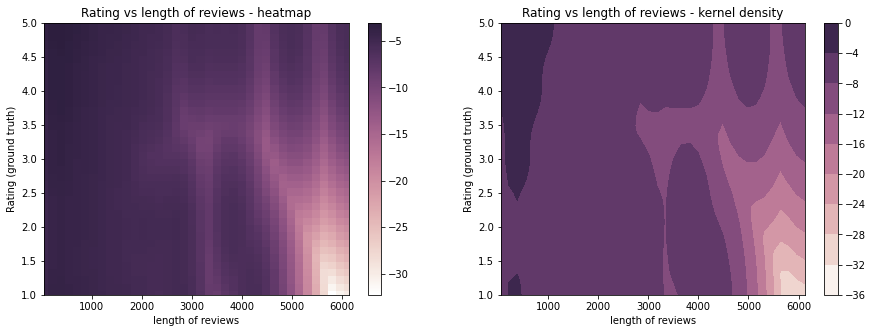

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(review_length.min(), review_length.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(review_length.min(), review_length.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('length of reviews')
ax1.set_ylabel('Rating (ground truth)')

ax2.set_xlabel('length of reviews')
ax2.set_ylabel('Rating (ground truth)')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs length of reviews - heatmap')
ax2.set_title('Rating vs length of reviews - kernel density');

From the scatterplot and heatmap above, we could notice that:

1. For most of the rating scores, the length of reviews fall between 0-2000.

2. The higher the rating score, people are more likely to leave longer comments.


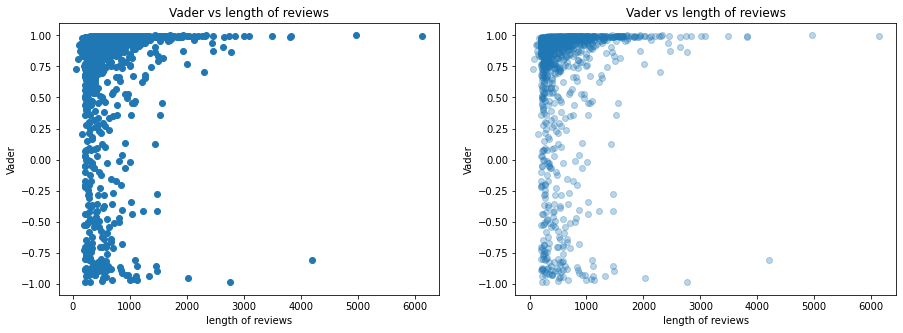

In [ ]:
# vader score & length of review
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
review_length = finaldf['review_length'].values
vader_scores = finaldf['vader'].values

ax[0].plot(review_length, vader_scores,"o")
ax[1].plot(review_length, vader_scores, "o", alpha=0.3)

ax[0].set_title('Vader vs length of reviews')
ax[1].set_title('Vader vs length of reviews')

for _ax in ax:
  _ax.set_ylabel('Vader')
  _ax.set_xlabel('length of reviews')

In [ ]:
k = gaussian_kde(np.vstack([review_length, vader_scores]))
xi, yi = np.mgrid[review_length.min():review_length.max():review_length.size**0.5*1j,vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

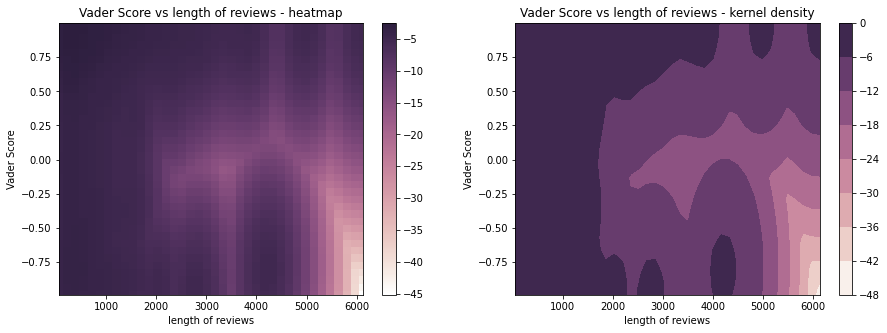

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(review_length.min(), review_length.max())
ax1.set_ylim(vader_scores.min(), vader_scores.max())
ax2.set_xlim(review_length.min(), review_length.max())
ax2.set_ylim(vader_scores.min(), vader_scores.max())

ax1.set_xlabel('length of reviews')
ax1.set_ylabel('Vader Score')

ax2.set_xlabel('length of reviews')
ax2.set_ylabel('Vader Score')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Vader Score vs length of reviews - heatmap')
ax2.set_title('Vader Score vs length of reviews - kernel density');

From the scatterplot and heatmap above, we could notice that:

1. For most of the rating scores, the length of reviews fall between 0-1000. Most of the points fall in the top left.

2. The higher the rating score, people are more likely to leave longer comments, this trend is the same as the trend for ground truth score vs. length of reviews.


####(iii)

In [ ]:
review_counts = hotelDf.groupby('hotelName')['reviewColumn'].count()

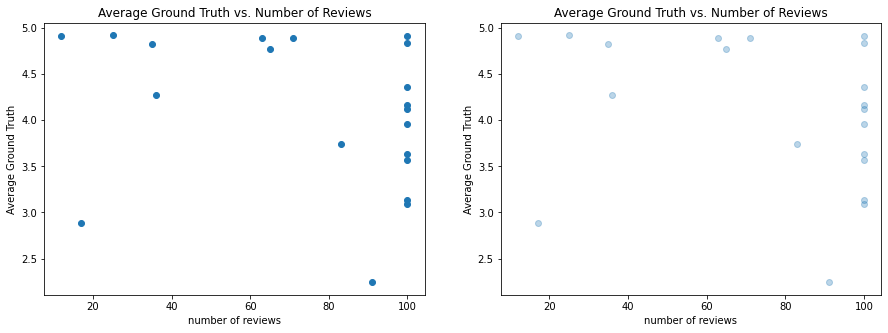

In [ ]:
# Average Ground Truth vs. Number of Reviews
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
review_count_value = review_counts.values
avg_gt = avg_rating_df['AverageRatingScore'].values

ax[0].plot(review_count_value, avg_gt,"o")
ax[1].plot(review_count_value, avg_gt, "o", alpha=0.3)

ax[0].set_title('Average Ground Truth vs. Number of Reviews')
ax[1].set_title('Average Ground Truth vs. Number of Reviews')

for _ax in ax:
  _ax.set_ylabel('Average Ground Truth')
  _ax.set_xlabel('number of reviews')

In [ ]:
k = gaussian_kde(np.vstack([review_count_value, avg_gt]))
xi, yi = np.mgrid[review_count_value.min():review_count_value.max():review_count_value.size**0.5*1j,avg_gt.min():avg_gt.max():avg_gt.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

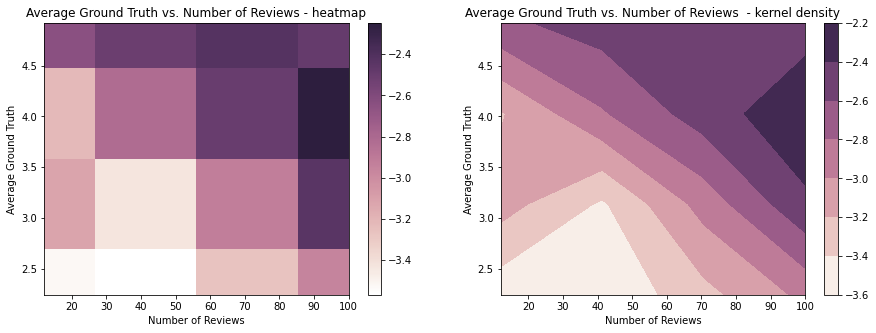

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(review_count_value.min(), review_count_value.max())
ax1.set_ylim(avg_gt.min(), avg_gt.max())
ax2.set_xlim(review_count_value.min(), review_count_value.max())
ax2.set_ylim(avg_gt.min(), avg_gt.max())

ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('Average Ground Truth')

ax2.set_xlabel('Number of Reviews')
ax2.set_ylabel('Average Ground Truth')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Average Ground Truth vs. Number of Reviews - heatmap')
ax2.set_title('Average Ground Truth vs. Number of Reviews  - kernel density');

From the scatterplot and heatmap above, we could notice that:

1. People with high ratings for hotel are more likely to leave reviews.

2. For most of the hotel, the number of reviews fall in about 100 reviews.


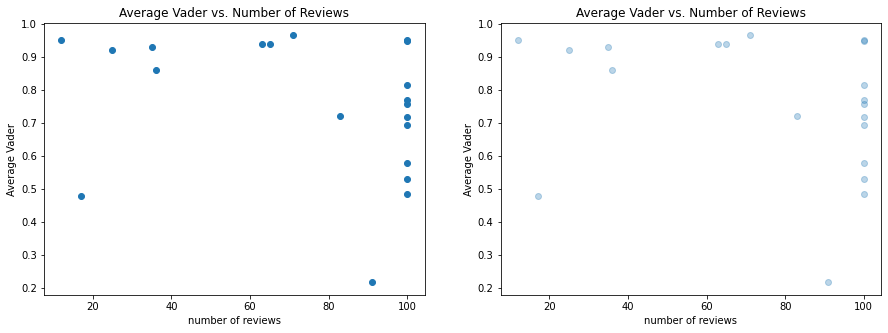

In [ ]:
 # Average Vader Scores vs. Number of Reviews
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
review_count_value = review_counts.values
avg_vader = avg_rating_df['AverageVader'].values

ax[0].plot(review_count_value, avg_vader,"o")
ax[1].plot(review_count_value, avg_vader, "o", alpha=0.3)

ax[0].set_title('Average Vader vs. Number of Reviews')
ax[1].set_title('Average Vader vs. Number of Reviews')

for _ax in ax:
  _ax.set_ylabel('Average Vader')
  _ax.set_xlabel('number of reviews')

In [ ]:
k = gaussian_kde(np.vstack([review_count_value, avg_vader]))
xi, yi = np.mgrid[review_count_value.min():review_count_value.max():review_count_value.size**0.5*1j,avg_vader.min():avg_vader.max():avg_vader.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

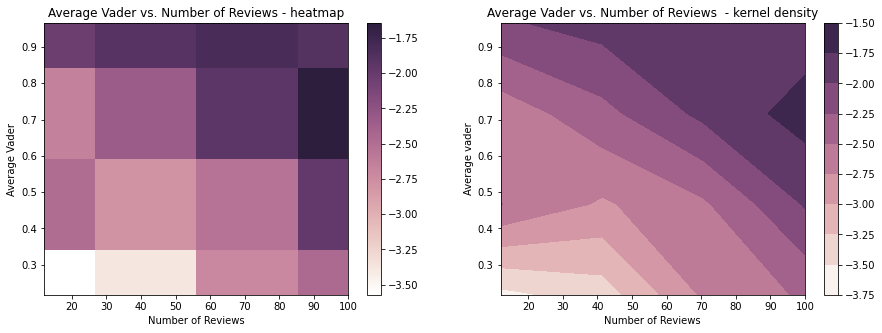

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(review_count_value.min(), review_count_value.max())
ax1.set_ylim(avg_vader.min(), avg_vader.max())
ax2.set_xlim(review_count_value.min(), review_count_value.max())
ax2.set_ylim(avg_vader.min(), avg_vader.max())

ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('Average Vader')

ax2.set_xlabel('Number of Reviews')
ax2.set_ylabel('Average vader')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Average Vader vs. Number of Reviews - heatmap')
ax2.set_title('Average Vader vs. Number of Reviews  - kernel density');

From the scatterplot and heatmap above, we could notice that:

1. People with high ratings for hotel are more likely to leave reviews, this match the trend for average rating vs. number of reviews.

2. For most of the hotel, the number of reviews fall in about 100 reviews.

### (d) Location-based patterns

Use folium2 and the reported location data to visualize the location of the hotels on a map. Adjust the labels to reflect their average ground truth sentiment values. Does it appear as though there are any visible relations between location and reviews? Are there are any areas you would recommend staying or avoiding? Note: Save a screen shot of your map and preview that image in your notebook. If not, the map will not render nicely in GitHub.

In [ ]:
def make_address(row):
  # individual columns need to be combined
  return row['streetAddress']+", "+row['City']+", "+row['Province']

In [ ]:
hotelDf

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data/ca/181775/1185471/763880848.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Breakfast - all sugary. Do not pay more to th...",2,negative,09-Aug-20,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
1,data/ca/181775/1185471/656999094.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Rented 3 rooms for a sledding trip. Main heat...",3,negative,07-Mar-19,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
2,data/ca/181775/1185471/753683606.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Great place to stay in Revelstoke, not far fr...",4,positive,18-May-20,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
3,data/ca/181775/1185471/694438633.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""Very clean lobby offering a good first impres...",4,positive,31-Jul-19,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
4,data/ca/181775/1185471/810428446.html,Days Inn &amp; Suites by Wyndham Revelstoke,"""We just stayed overnight on our way from Drum...",5,positive,17-Sep-21,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0
...,...,...,...,...,...,...,...,...,...,...
1493,data/ca/181775/1389114/116861417.html,Adventurer&#39;s Guest House,"""The Adventurer's Guest House is a delight in ...",5,positive,17-Aug-11,1789 Hay Rd,"('Revelstoke',)",British Columbia,V0E 2S3
1494,data/ca/181775/1389114/125255618.html,Adventurer&#39;s Guest House,"""Just returned from 6 nights staying with Kirk...",5,positive,26-Feb-12,1789 Hay Rd,"('Revelstoke',)",British Columbia,V0E 2S3
1495,data/ca/181775/1389114/89676946.html,Adventurer&#39;s Guest House,"""This B&B is the perfect spot for your Revelst...",5,positive,12-Dec-10,1789 Hay Rd,"('Revelstoke',)",British Columbia,V0E 2S3
1496,data/ca/181775/1389114/112618624.html,Adventurer&#39;s Guest House,"""During our trip through BC, we had the luck t...",5,positive,10-Jun-11,1789 Hay Rd,"('Revelstoke',)",British Columbia,V0E 2S3


In [ ]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(hotelDf.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df = geo_rating_df.replace(["6032 Lundy's Lane, Niagara Falls, Ontario"],'732 Manzanita Dr, Laguna Beach, California')


In [ ]:
geo_rating_df

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address
hotelName,,,,,,,,
Adventurer&#39;s Guest House,0.939200,4.888889,63,1789 Hay Rd,"('Revelstoke',)",British Columbia,V0E 2S3,"1789 Hay Rd, ('Revelstoke',), British Columbia"
Alpenrose Bed and Breakfast,0.951429,4.840000,100,1524 Nichol Rd,"('Revelstoke',)",British Columbia,V0E 2S1,"1524 Nichol Rd, ('Revelstoke',), British Columbia"
Alpine Inn &amp; Suites,0.530298,3.090000,100,1001 West Second Street,"('Revelstoke',)",British Columbia,V0E 2S0,"1001 West Second Street, ('Revelstoke',), Brit..."
Best Western Plus Revelstoke,0.920288,4.920000,25,1925 Laforme Blvd,"('Revelstoke',)",British Columbia,V0E 2S0,"1925 Laforme Blvd, ('Revelstoke',), British Co..."
Courthouse Inn Revelstoke,0.949941,4.910000,100,312 Kootenay Street Box 2388,"('Revelstoke',)",British Columbia,V0E 2S0,"312 Kootenay Street Box 2388, ('Revelstoke',),..."
Days Inn &amp; Suites by Wyndham Revelstoke,0.578605,3.570000,100,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0,"301 Wright St, ('Revelstoke',), British Columbia"
Frontier Motel,0.217448,2.241758,91,122 Highway 23 North,"('Revelstoke',)",British Columbia,V0E 2S0,"122 Highway 23 North, ('Revelstoke',), British..."
Glacier House Resort,0.758774,4.120000,100,1870 Glacier Lane Box 250,"('Revelstoke',)",British Columbia,VOE 2S0,"1870 Glacier Lane Box 250, ('Revelstoke',), Br..."
Grizz Hotel,0.478953,2.882353,17,200 3rd Street West,"('Revelstoke',)",British Columbia,V0E 2S0,"200 3rd Street West, ('Revelstoke',), British ..."


In [ ]:
# 0 - need to give the tool a generic name.
locator = Photon(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
Adventurer&#39;s Guest House,0.939200,4.888889,63,1789 Hay Rd,"('Revelstoke',)",British Columbia,V0E 2S3,"1789 Hay Rd, ('Revelstoke',), British Columbia","(Hay Road, V0E 2S1, Revelstoke, British Columb...","(50.9835746, -118.1701665, 0.0)",50.983575,-118.170166,0.0
Alpenrose Bed and Breakfast,0.951429,4.840000,100,1524 Nichol Rd,"('Revelstoke',)",British Columbia,V0E 2S1,"1524 Nichol Rd, ('Revelstoke',), British Columbia","(Nichol Road, V0E 2S1, Revelstoke, British Col...","(50.975827, -118.1898287, 0.0)",50.975827,-118.189829,0.0
Alpine Inn &amp; Suites,0.530298,3.090000,100,1001 West Second Street,"('Revelstoke',)",British Columbia,V0E 2S0,"1001 West Second Street, ('Revelstoke',), Brit...","(Alpine Inn & Suites, 1001, 2nd Street West, V...","(51.0037945, -118.206286, 0.0)",51.003794,-118.206286,0.0
Best Western Plus Revelstoke,0.920288,4.920000,25,1925 Laforme Blvd,"('Revelstoke',)",British Columbia,V0E 2S0,"1925 Laforme Blvd, ('Revelstoke',), British Co...","(Best Western Plus Revelstoke, 1925, Laforme B...","(51.00991175, -118.21932227541842, 0.0)",51.009912,-118.219322,0.0
Courthouse Inn Revelstoke,0.949941,4.910000,100,312 Kootenay Street Box 2388,"('Revelstoke',)",British Columbia,V0E 2S0,"312 Kootenay Street Box 2388, ('Revelstoke',),...",None,None,NaN,NaN,NaN
Days Inn &amp; Suites by Wyndham Revelstoke,0.578605,3.570000,100,301 Wright St,"('Revelstoke',)",British Columbia,V0E 2S0,"301 Wright St, ('Revelstoke',), British Columbia","(Days Inn & Suites Revelstoke, 301, Wright Str...","(51.0077574, -118.2130097173816, 0.0)",51.007757,-118.213010,0.0
Frontier Motel,0.217448,2.241758,91,122 Highway 23 North,"('Revelstoke',)",British Columbia,V0E 2S0,"122 Highway 23 North, ('Revelstoke',), British...","(Highway 23, V0E 3S0, Revelstoke, British Colu...","(51.0017053, -118.2325185, 0.0)",51.001705,-118.232518,0.0
Glacier House Resort,0.758774,4.120000,100,1870 Glacier Lane Box 250,"('Revelstoke',)",British Columbia,VOE 2S0,"1870 Glacier Lane Box 250, ('Revelstoke',), Br...","(Glacier House Resort, 1870, Glacier Lane, V0E...","(51.04912535, -118.21634536747933, 0.0)",51.049125,-118.216345,0.0
Grizz Hotel,0.478953,2.882353,17,200 3rd Street West,"('Revelstoke',)",British Columbia,V0E 2S0,"200 3rd Street West, ('Revelstoke',), British ...","(Grizz Hotel, 200, 3rd Street West, V0E 3S0, 3...","(50.9987574, -118.1973365, 0.0)",50.998757,-118.197337,0.0


In [ ]:
map1 = folium.Map(
    location=[51.00991175, -118.21932227541842], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)

geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                                             radius=row['AverageRatingScore']*2, 
                                                             popup=folium.Popup('Average Rating Score: '+str(row['AverageRatingScore']), 
                                                                                max_width=200, 
                                                                                min_width=0.05,
                                                                                style='font-size: '+str(row['AverageRatingScore']*10000)+'px'), 
                                                             color='#d7191c').add_to(map1), axis=1)

map1

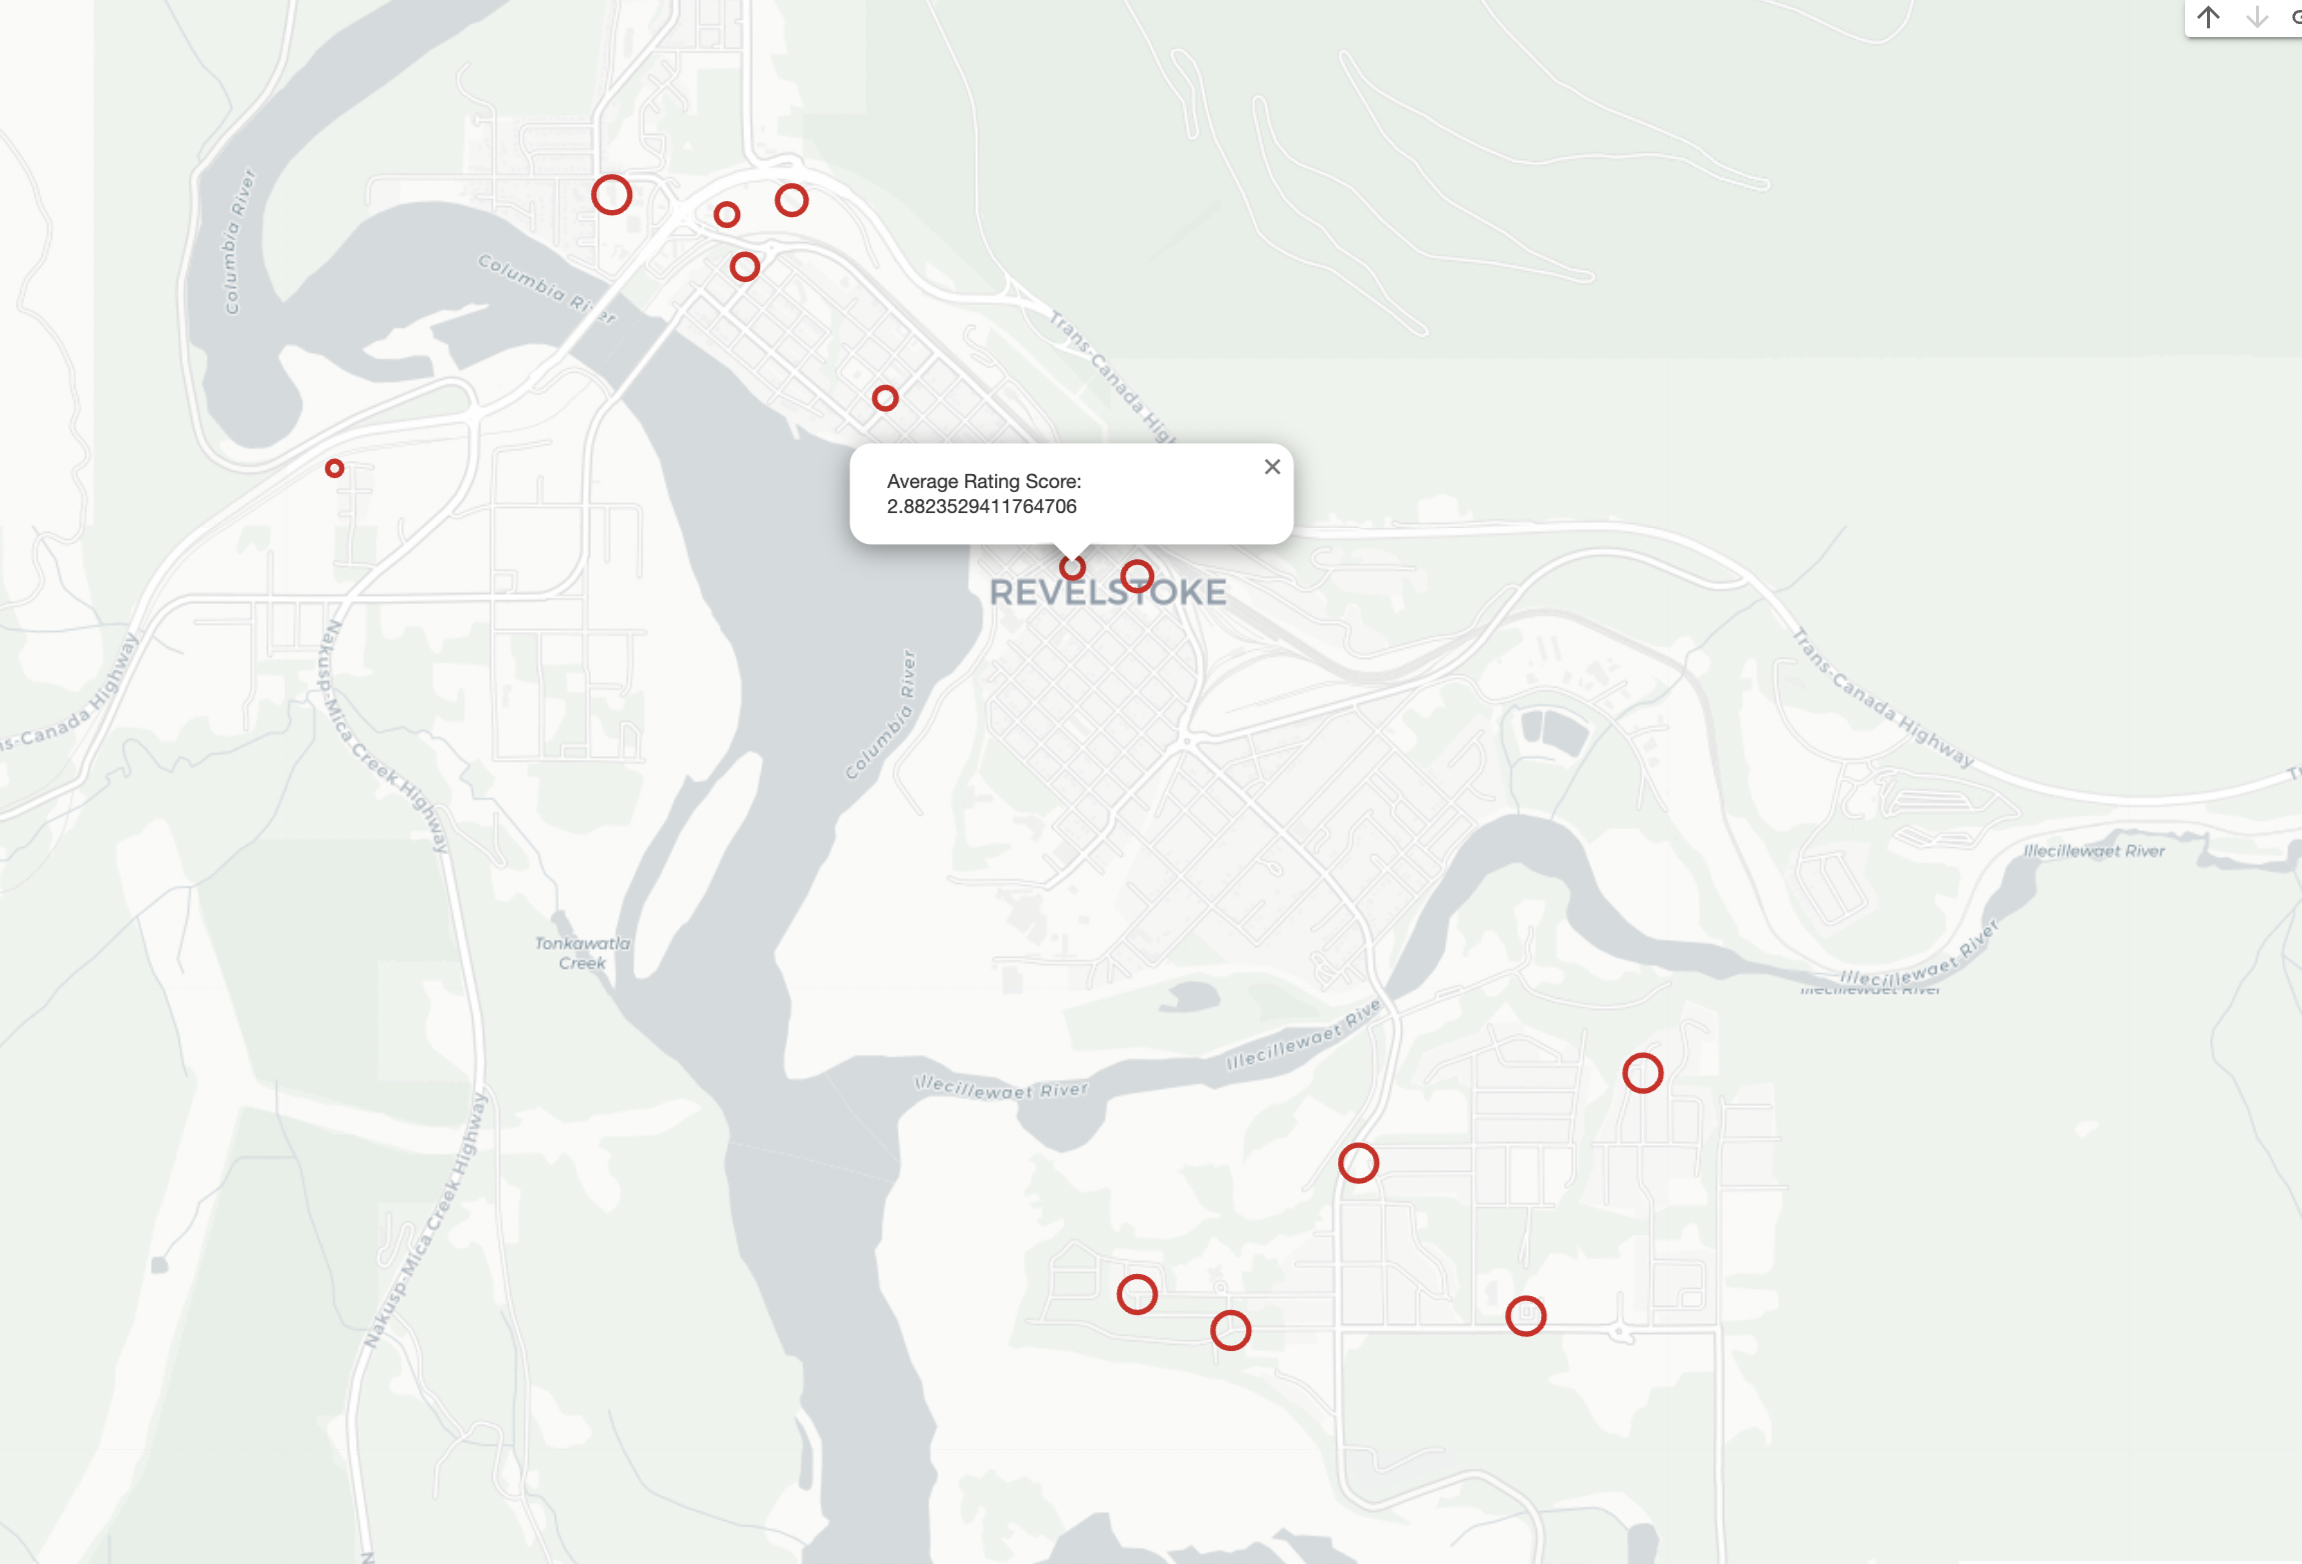

The hotel located at the south coast of Illecillewaet River have higher ratings than the hotel located at the north coast.

Based on the map above, I would recommend to choose hotels located at the south coast of the Illecillewaet River. South coast of the Illecillewaet River is far away from the highway and the rating for hotels are higher.

###(e) Temporal analysis

Using a sample of 6 hotels (2 highly rated, 2 lowly rated, and 2 mediocre) with a large number of reviews complete the following:

In [ ]:
avgRating_sorted = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)

In [ ]:
avgRating_sorted

,hotelName,AverageVader,AverageRatingScore,n_reviews
3,Best Western Plus Revelstoke,0.920288,4.920000,25
17,The Copeland,0.950758,4.916667,12
4,Courthouse Inn Revelstoke,0.949941,4.910000,100
0,Adventurer&#39;s Guest House,0.939200,4.888889,63
15,Selkirk Mountain Experience,0.965638,4.887324,71
1,Alpenrose Bed and Breakfast,0.951429,4.840000,100
9,Journey&#39;s Perch Guesthouse,0.931023,4.828571,35
12,Powder Pillow Bed &amp; Breakfast,0.940085,4.769231,65
18,The Sutton Place Hotel Revelstoke Mountain Resort,0.816554,4.360000,100
10,Mulvehill Creek Wilderness Inn and Wedding Chapel,0.859583,4.277778,36


Based on the record, in order to have more accurate insights, I chose the hotel with large number of reviews. 

For highly rated hotels, I chose `Courthouse Inn Revelstoke` and `Selkirk Mountain Experience`;

For mediocre, I chose `The Sutton Place Hotel Revelstoke Mountain Resort` and `Ramada by Wyndham Revelstoke`.

For lowly rated, I chose `Super 8 by Wyndham Revelstoke BC` and `Alpine Inn &amp; Suites`.

In [ ]:
select_hotels = np.array(['Courthouse Inn Revelstoke','Selkirk Mountain Experience',
'Super 8 by Wyndham Revelstoke BC','Alpine Inn &amp; Suites',
'The Sutton Place Hotel Revelstoke Mountain Resort','Ramada by Wyndham Revelstoke'])

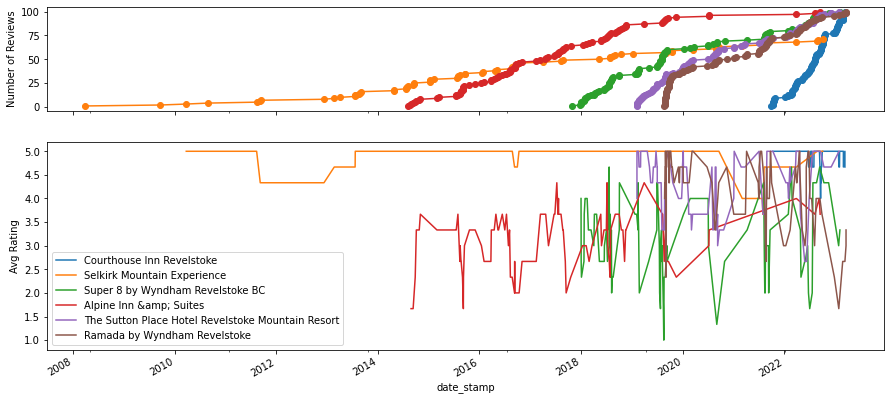

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                       'height_ratios': [1, 2]})

for hotel in select_hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

From the plot above, for highly rated hotels, the hotel rating are consistent (in highly rated); For lowly rated hotels, the hotel rating are fluctuate.

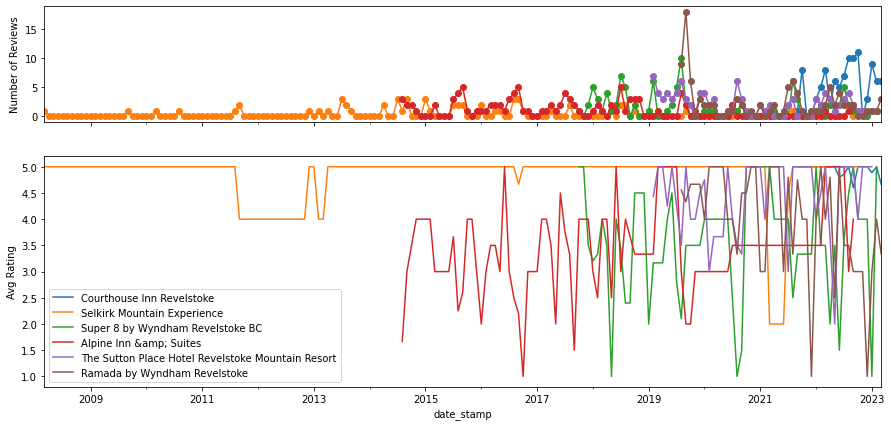

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in select_hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

The fluctuation of hotels become frequently after 2019, which is the first time the number of reviews increase, and become more frequently as the number of reviews increase.

Reason: This may due to as the number of customers increase, the service quality may not as good as before, and as the number of customers increase, the number of reivews increase as well.